<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Outils-projet" data-toc-modified-id="Outils-projet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Outils projet</a></span></li><li><span><a href="#La-lecture-de-l'échantillon-initial" data-toc-modified-id="La-lecture-de-l'échantillon-initial-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>La lecture de l'échantillon initial</a></span></li><li><span><a href="#Les-valeurs-manquantes" data-toc-modified-id="Les-valeurs-manquantes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Les valeurs manquantes</a></span><ul class="toc-item"><li><span><a href="#Les-variables-qualitatives" data-toc-modified-id="Les-variables-qualitatives-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Les variables qualitatives</a></span></li><li><span><a href="#Les-variables-Quantitatives" data-toc-modified-id="Les-variables-Quantitatives-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Les variables Quantitatives</a></span><ul class="toc-item"><li><span><a href="#The-number-of-cigarettes-that-the-person-smoked-on-average-in-one-day" data-toc-modified-id="The-number-of-cigarettes-that-the-person-smoked-on-average-in-one-day-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>The number of cigarettes that the person smoked on average in one day</a></span></li><li><span><a href="#Total-cholesterol-level" data-toc-modified-id="Total-cholesterol-level-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Total cholesterol level</a></span></li><li><span><a href="#Body-Mass-Index" data-toc-modified-id="Body-Mass-Index-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Body Mass Index</a></span></li><li><span><a href="#Glucose" data-toc-modified-id="Glucose-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Glucose</a></span></li><li><span><a href="#Heart-Rate" data-toc-modified-id="Heart-Rate-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Heart Rate</a></span></li></ul></li></ul></li><li><span><a href="#La-separation-des-données-pour-l'apprentissage" data-toc-modified-id="La-separation-des-données-pour-l'apprentissage-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>La separation des données pour l'apprentissage</a></span></li></ul></div>

>> **Vous trouvez les données et leur description :**<br>
>> https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression<br>

In [1]:
import pandas as pd              
import seaborn as sns  
import os, warnings

%pylab inline

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")
seed = 123456789

Populating the interactive namespace from numpy and matplotlib


# Outils projet

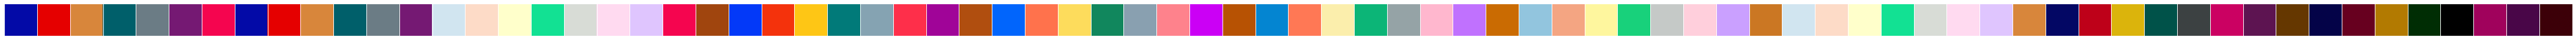

In [2]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973",
            "#f5054f", 
            "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", "#d1e5f0", "#fddbc7",
            "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#f5054f", "#a0450e",
            "#0339f8", "#f4320c", "#fec615", "#017a79", "#85a3b2", "#fe2f4a", "#a00498", "#b04e0f",
            "#0165fc", "#ff724c", "#fddc5c", "#11875d", "#89a0b0", "#fe828c", "#cb00f5", "#b75203",
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#ffb7ce", "#c071fe", "#ca6b02",
            "#92c5de", "#f4a582", "#fef69e", "#18d17b", "#c5c9c7", "#ffcfdc", "#caa0ff", "#cb7723",
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#d8863b",
            "#030764", "#be0119", "#dbb40c", "#005249", "#3c4142", "#cb0162", "#5d1451", "#653700",
            "#040348", "#67001f", "#b27a01", "#002d04", "#000000", "#a0025c", "#490648", "#3c0008"
          ]
sns.palplot(sns.color_palette(palette))

In [3]:
from datetime import datetime as dt

repertoireRacine  = '.'
nomProjet         = 'Prédire les maladies cardiaques'

repertoireProjet  = os.path.join(repertoireRacine, nomProjet)
repertoireDonnees = os.path.join(repertoireProjet, 'repertoire.donnees')
repertoireImages  = os.path.join(repertoireProjet, 'repertoire.images')


def controleExistenceRepertoire( repertoire, create_if_needed=True):
    """Voir si le répertoire existe. S'il n'existe pas il est créé."""
    path_exists = os.path.exists(repertoire)
    if path_exists:
        if not os.path.isdir(repertoire):
            raise Exception("Trouvé le nom  "+repertoire +" mais c'est un fichier, pas un répertoire")
            # return False
        return True
    if create_if_needed:
        os.makedirs(repertoire)

def sauvegarderImage( fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    plt.savefig(os.path.join(repertoireImages,
                             fichier+f"--{dt.now().strftime('%Y_%m_%d_%H.%M.%S')}.png"), 
                             dpi=600, 
                             bbox_inches='tight')

def sauvegarderImageSNS( sns_plot, fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    fig = sns_plot.get_figure()
    fig.savefig(os.path.join(repertoireImages,fichier+'.png'))
    
controleExistenceRepertoire(repertoireProjet);
controleExistenceRepertoire(repertoireDonnees);
controleExistenceRepertoire(repertoireImages);

def afficheDistribution(colonne, cible):
        plt.figure(figsize=(14,12))
        sns.distplot(colonne[
                           cible == 1],
                       color="steelblue")
        sns.distplot(colonne[
                           cible == 0],
                       color="red")
        axline((colonne.median(), 0), (1, 1), linewidth=4, color='r')

In [4]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import NuSVC, SVC, OneClassSVM
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared, DotProduct, Matern, WhiteKernel

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.metrics import roc_curve, auc

from sklearn.metrics  import make_scorer, confusion_matrix, roc_curve, auc, accuracy_score, log_loss, hamming_loss, \
                             precision_score, recall_score, f1_score, jaccard_score,  \
                             precision_recall_curve, average_precision_score

In [5]:
from sklearn.preprocessing import LabelEncoder

# La lecture de l'échantillon initial


<img src="https://raw.githubusercontent.com/rbizoi/IntelligenceEnDonneesDeSante/main/images/EchantillonInitial.png" width="800">

In [6]:
donnees = pd.io.parsers.read_csv(
   filepath_or_buffer='https://raw.githubusercontent.com/rbizoi/IntelligenceEnDonneesDeSante/7f375ceb348093a9880b78ed3cb68a17c1799e95/donnees/Logistic%20regression%20To%20predict%20heart%20disease/framingham.csv'
   )
donnees.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
variablesQualitatives = ['male','education', 'currentSmoker', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']
variablesQuantitatives  = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
cible = 'TenYearCHD'
donnees.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
donnees[variablesQuantitatives].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4209.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,9.003089,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,11.920094,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,20.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [9]:
donnees[variablesQualitatives].describe()

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
count,4238.000000,4133.000000,4238.000000,4185.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,1.978950,0.494101,0.029630,0.005899,0.310524,0.025720
std,0.495022,1.019791,0.500024,0.169584,0.076587,0.462763,0.158316
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
donnees.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Les valeurs manquantes

## Les variables qualitatives

In [11]:
donnees[variablesQualitatives].isna().sum()

male                 0
education          105
currentSmoker        0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
dtype: int64

In [12]:
donnees.BPMeds[donnees.BPMeds.isnull()] = 0 

In [13]:
donnees.education[donnees.education.isna()] = 0

In [14]:
donnees.BPMeds = donnees.BPMeds.astype('int16')
donnees.education = donnees.education.astype('int16')

In [15]:
donnees[variablesQualitatives].isna().sum()

male               0
education          0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
dtype: int64

## Les variables Quantitatives

In [16]:
donnees[variablesQuantitatives].isna().sum()

age             0
cigsPerDay     29
totChol        50
sysBP           0
diaBP           0
BMI            19
heartRate       1
glucose       388
dtype: int64

In [17]:
def afficheDistribution(colonne, cible):
        plt.figure(figsize=(14,12))
        sns.distplot(colonne[
                           cible == 1],
                       color="steelblue")
        sns.distplot(colonne[
                           cible == 0],
                       color="red")
        axline((colonne.median(), 0), (colonne.median(), 1), linewidth=3, color='r')

### The number of cigarettes that the person smoked on average in one day

In [18]:
donnees.cigsPerDay.median() ,donnees.cigsPerDay.mean() 

(0.0, 9.003088619624615)

In [19]:
donnees.cigsPerDay[donnees.cigsPerDay.isna()] = donnees.cigsPerDay.median() 

In [20]:
donnees.cigsPerDay.isna().sum()

0

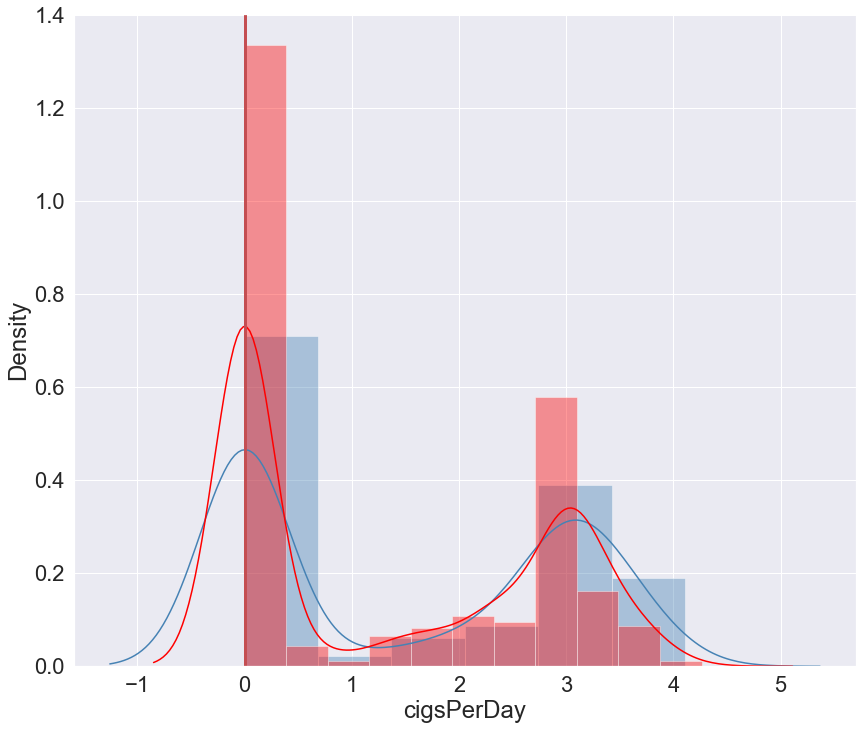

In [21]:
afficheDistribution(log(donnees.cigsPerDay+1), donnees.TenYearCHD)

### Total cholesterol level

In [22]:
donnees.totChol.median() ,donnees.totChol.mean() 

(234.0, 236.72158548233045)

In [23]:
donnees.totChol[donnees.totChol.isna()] = donnees.totChol.median() 

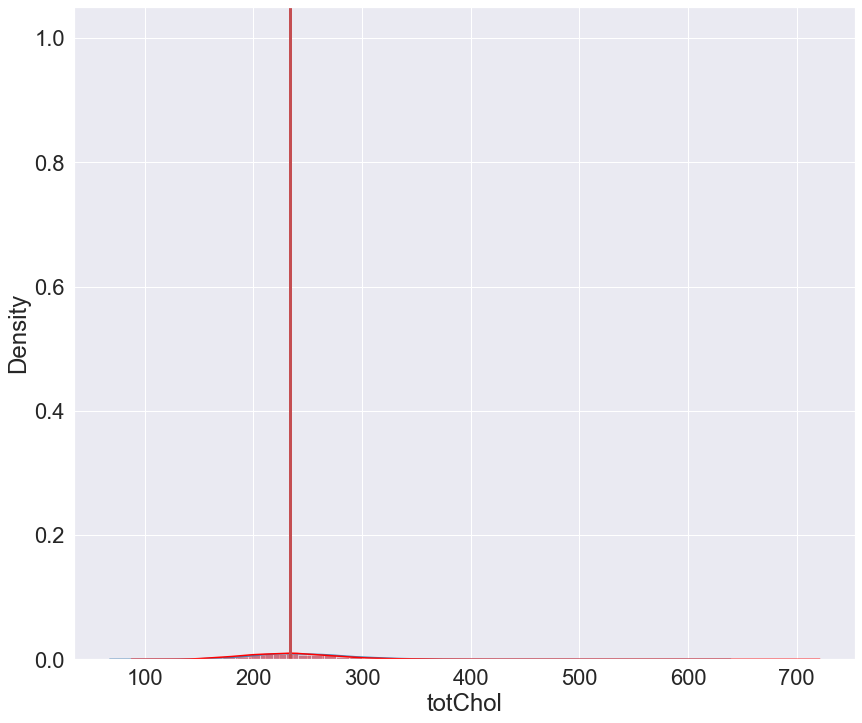

In [24]:
afficheDistribution(donnees.totChol, donnees.TenYearCHD)

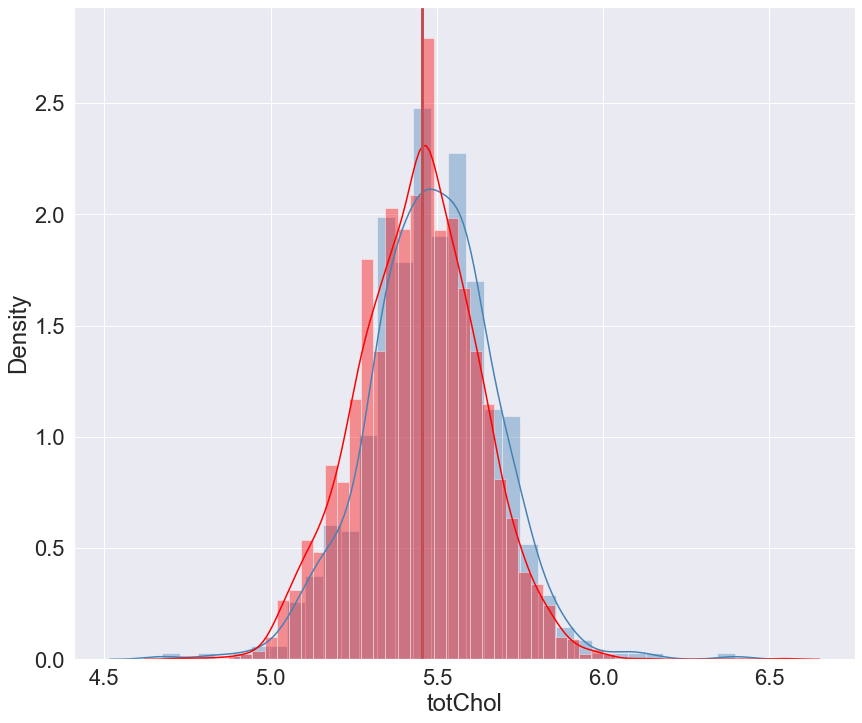

In [25]:
afficheDistribution(log(donnees.totChol), donnees.TenYearCHD)

### Body Mass Index

In [26]:
donnees.BMI.median() ,donnees.BMI.mean() 

(25.4, 25.80200758473572)

In [27]:
donnees.BMI[donnees.BMI.isna()] = donnees.BMI.median()

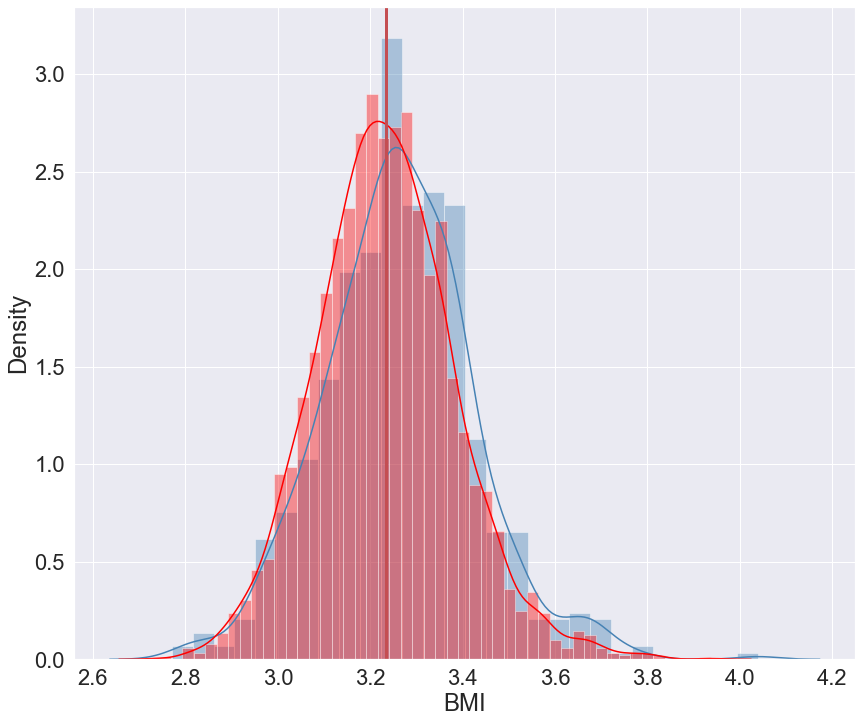

In [28]:
afficheDistribution(log(donnees.BMI), donnees.TenYearCHD)

### Glucose

In [29]:
donnees.glucose.median() ,donnees.glucose.mean()        

(78.0, 81.96675324675324)

In [30]:
donnees.glucose[donnees.glucose.isna()] = donnees.glucose.median()

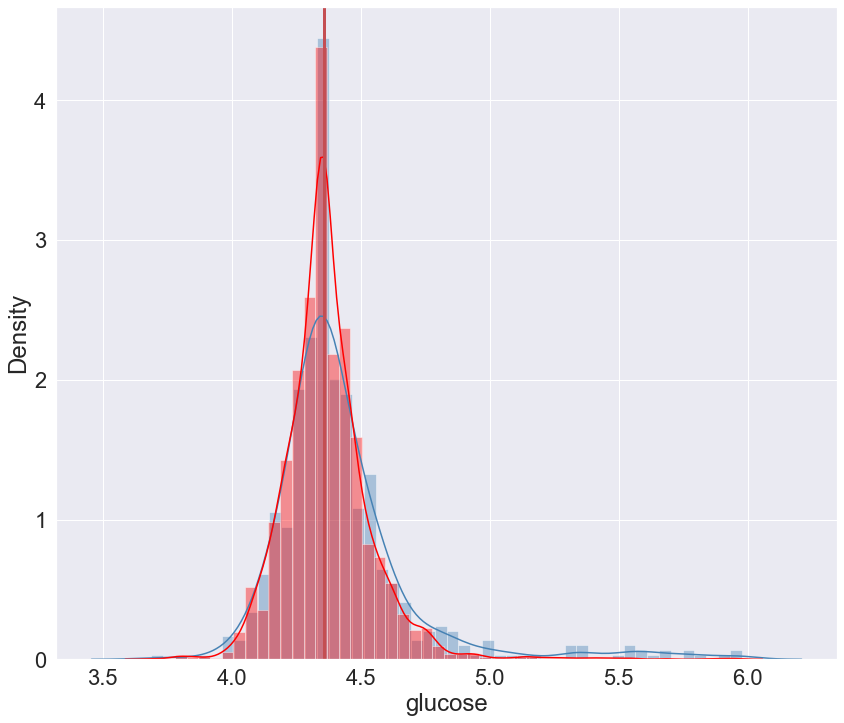

In [31]:
afficheDistribution(log(donnees.glucose), donnees.TenYearCHD)

### Heart Rate

In [32]:
donnees.heartRate.median() ,donnees.heartRate.mean()        

(75.0, 75.87892376681614)

In [33]:
donnees.heartRate[donnees.heartRate.isna()] = donnees.heartRate.median()

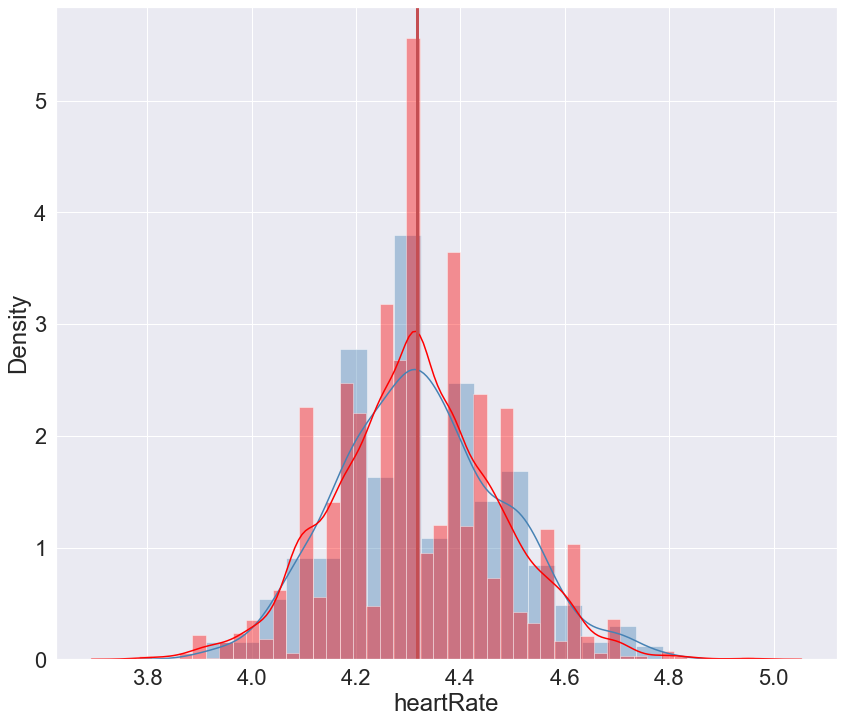

In [34]:
afficheDistribution(log(donnees.heartRate), donnees.TenYearCHD)

In [35]:
donnees[variablesQuantitatives].isna().sum()

age           0
cigsPerDay    0
totChol       0
sysBP         0
diaBP         0
BMI           0
heartRate     0
glucose       0
dtype: int64

In [36]:
donnees.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

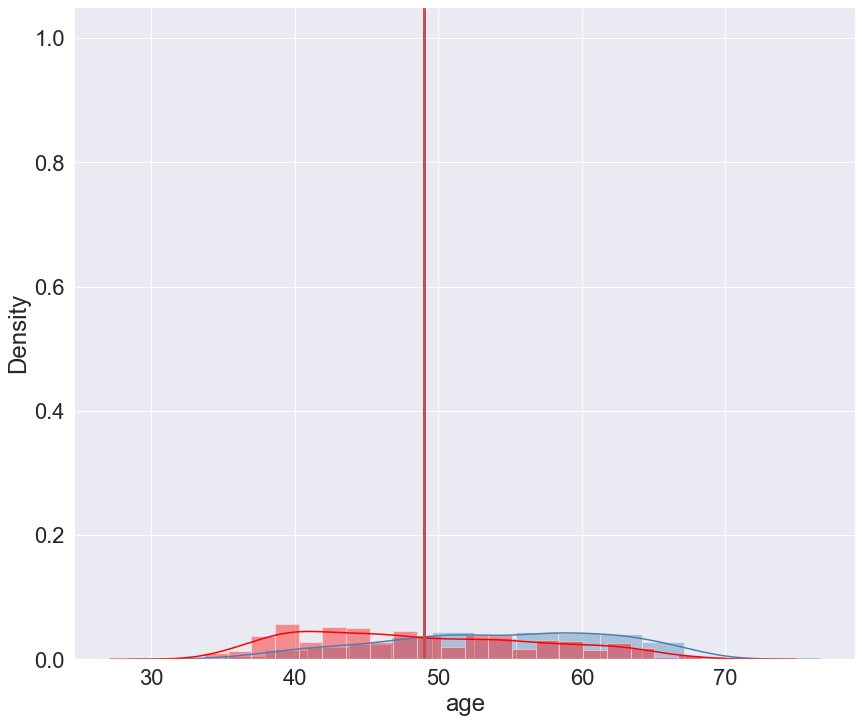

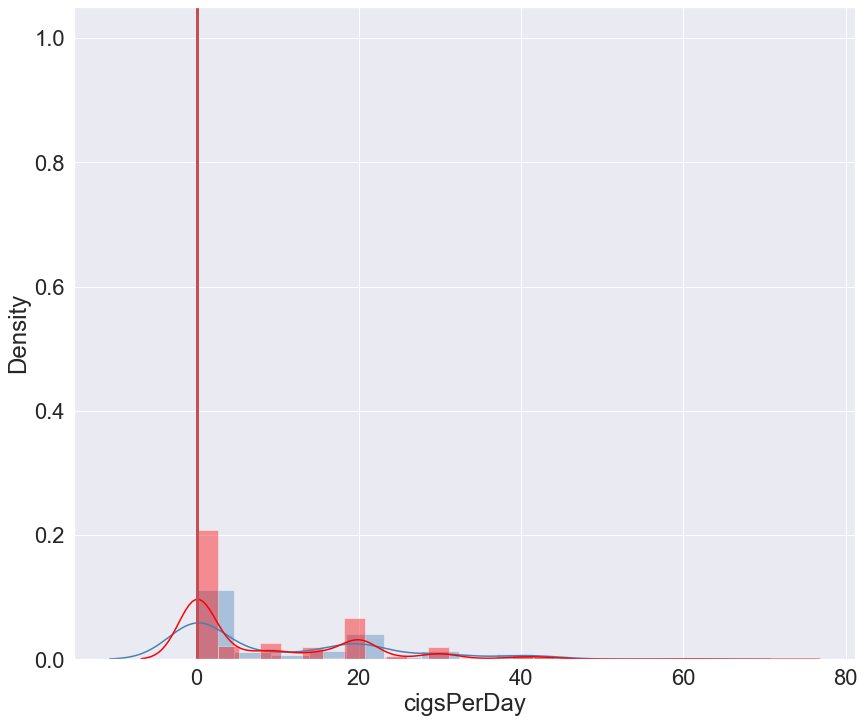

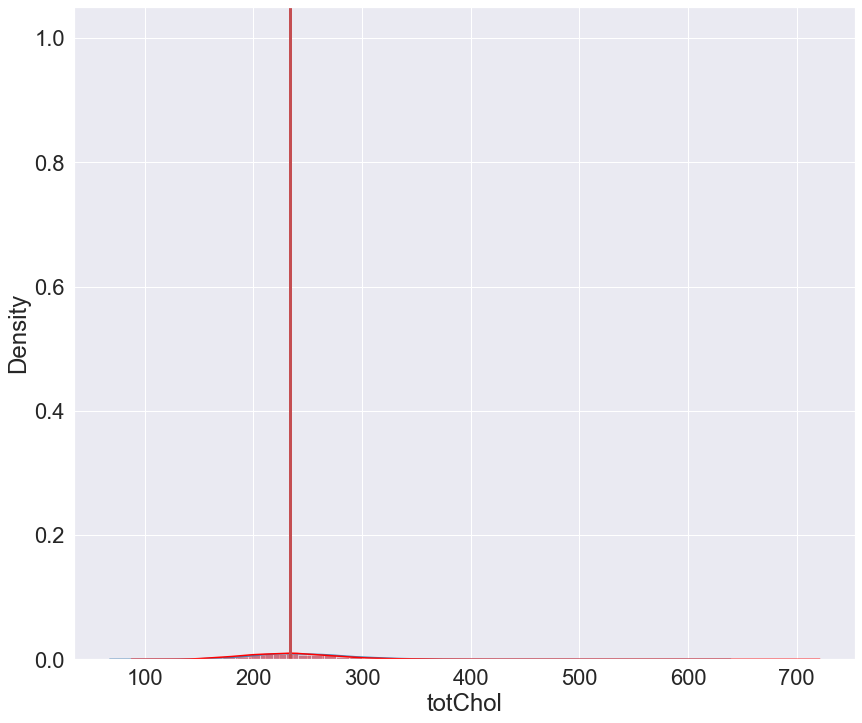

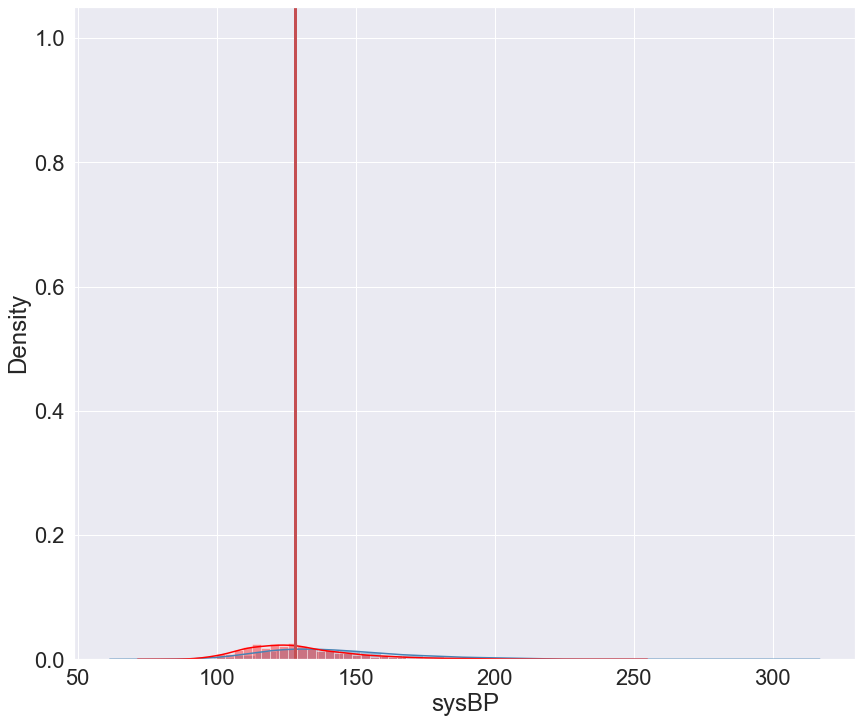

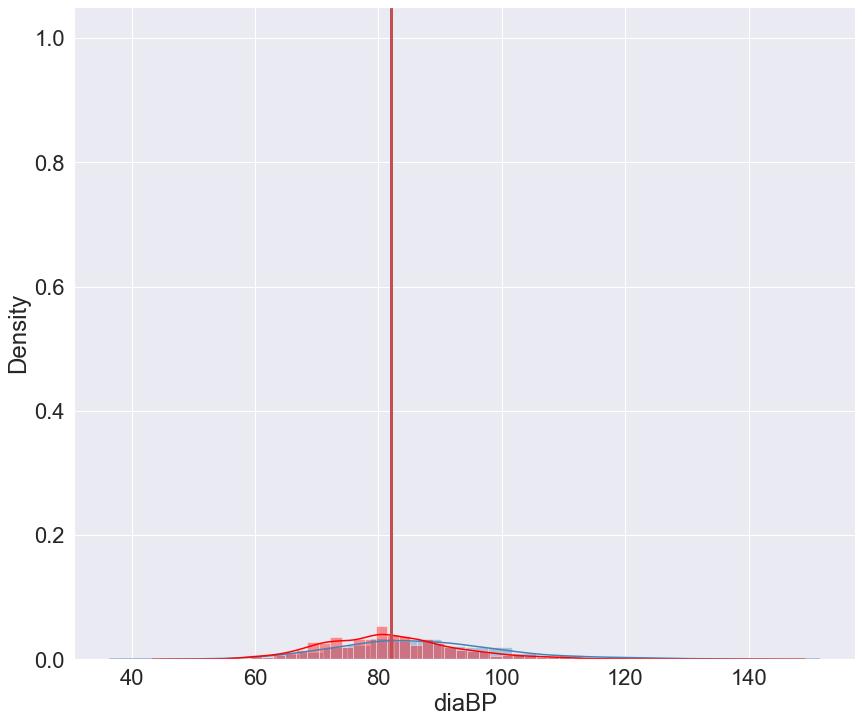

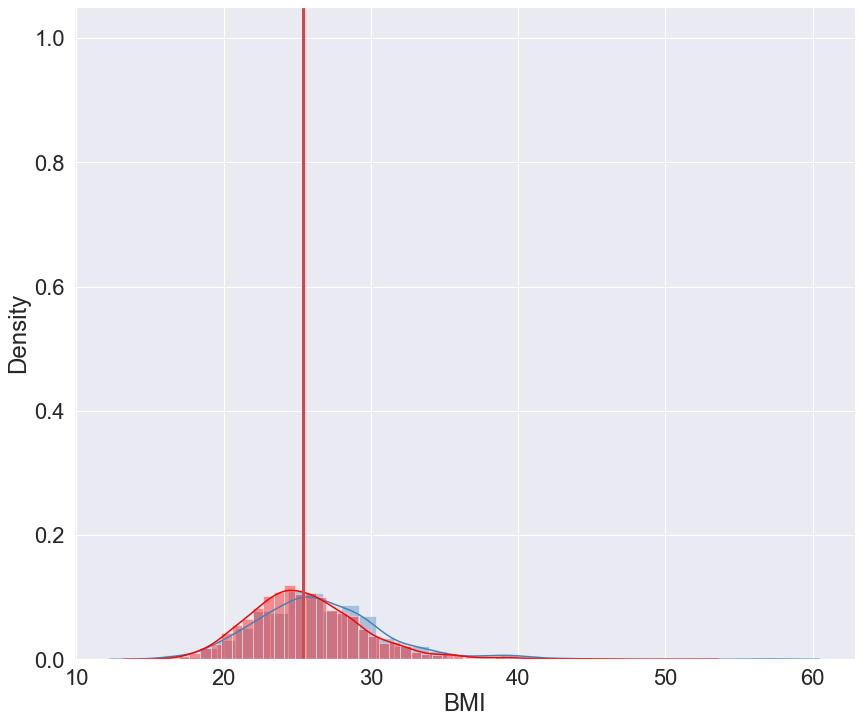

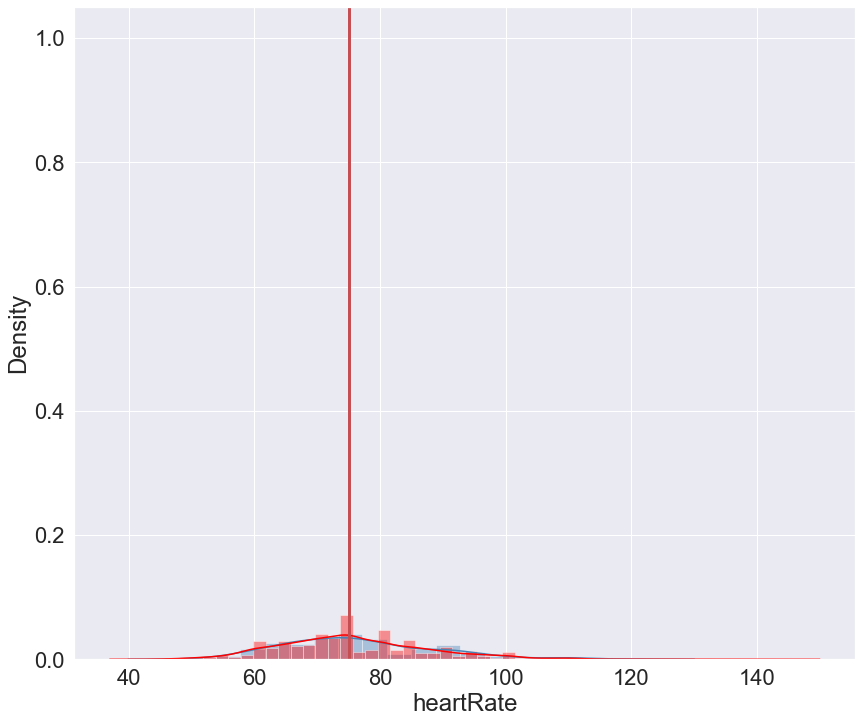

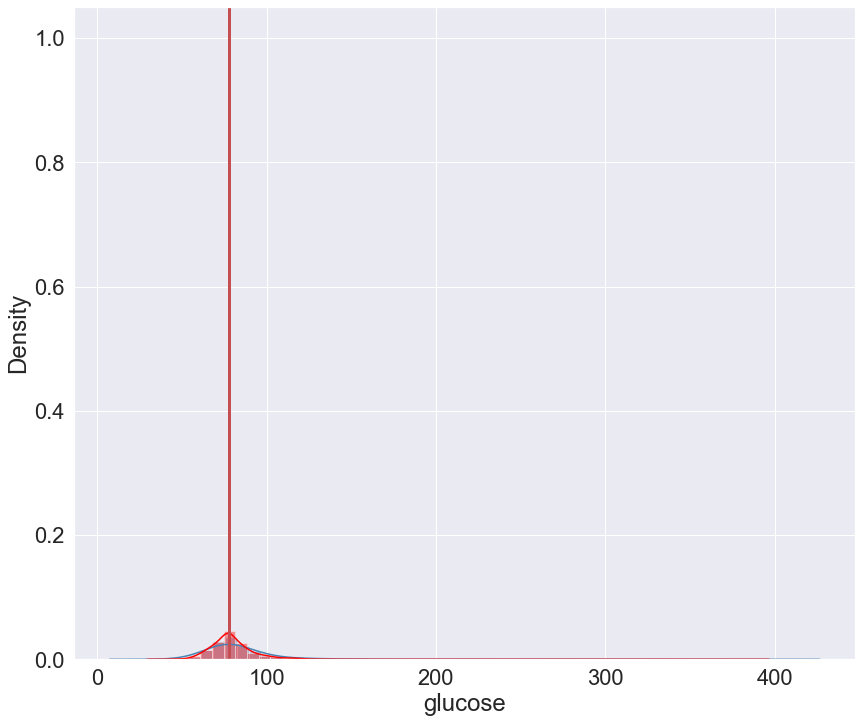

In [37]:
for colonne in variablesQuantitatives:
    afficheDistribution(donnees[colonne], donnees.TenYearCHD)

In [38]:
donnees_sauvegarde = donnees.copy()

In [39]:
donnees[variablesQuantitatives] = log(donnees[variablesQuantitatives]+1)

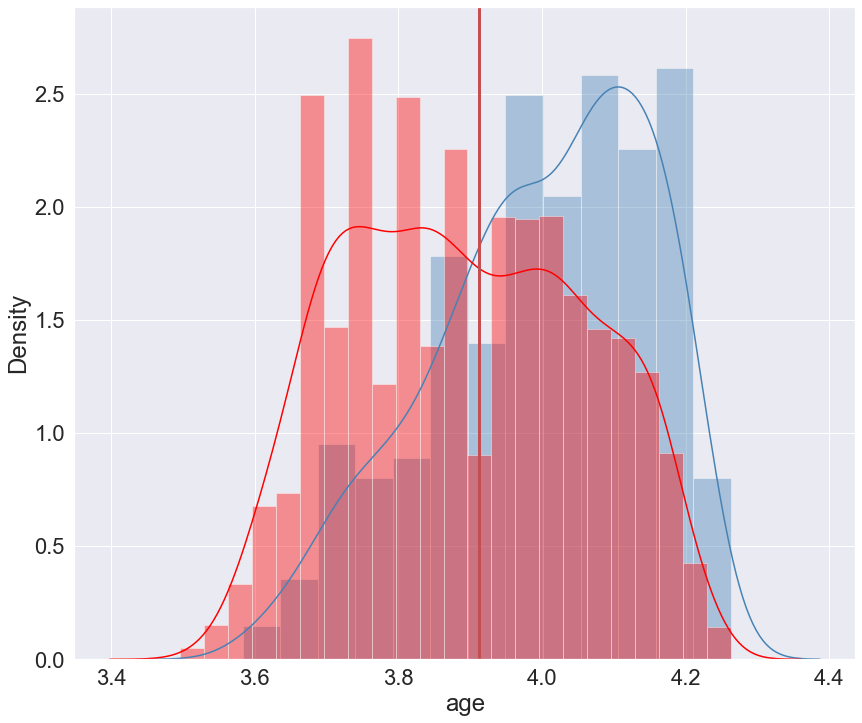

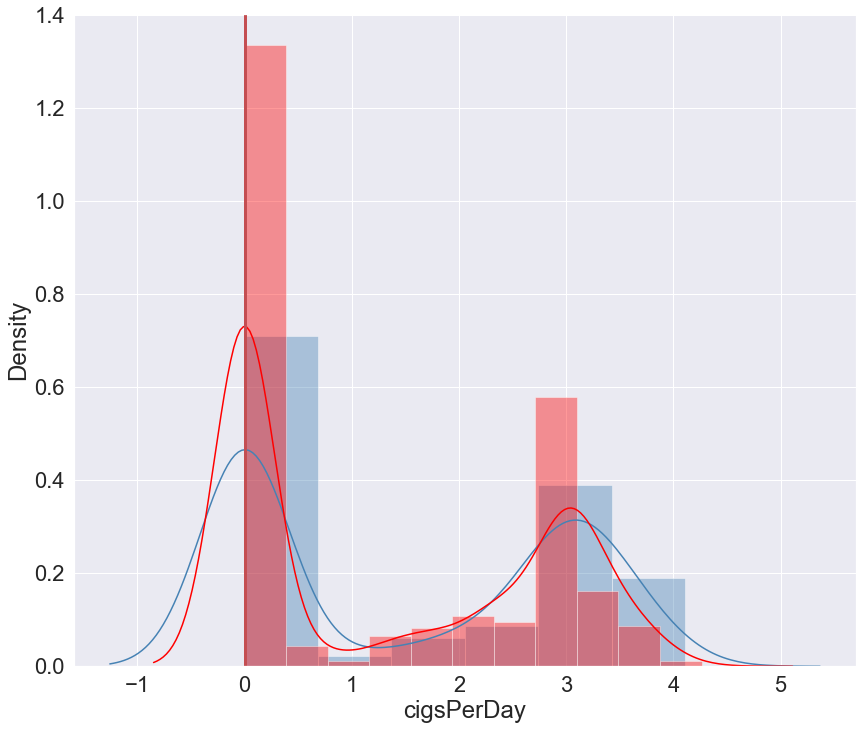

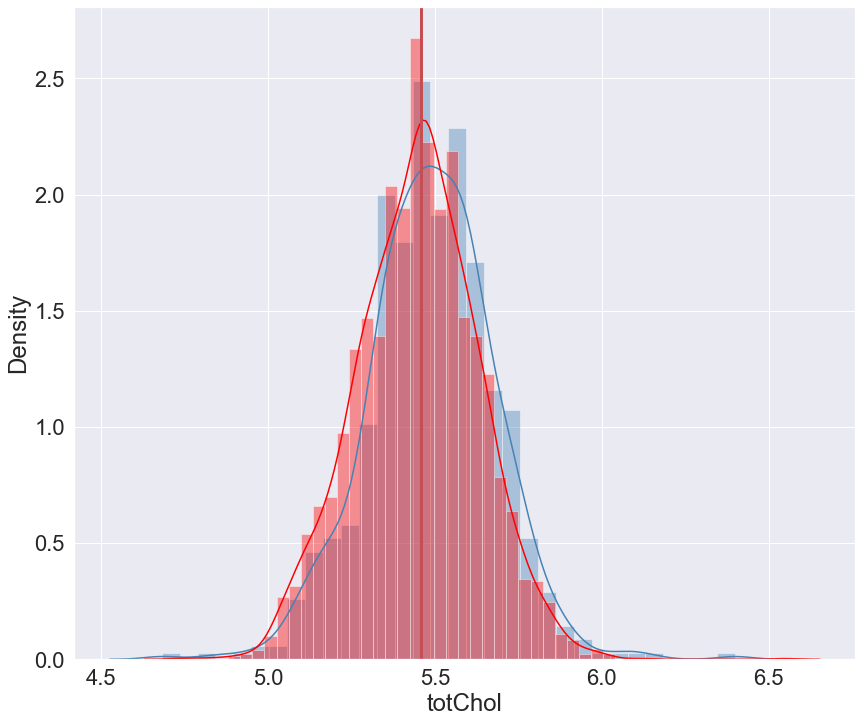

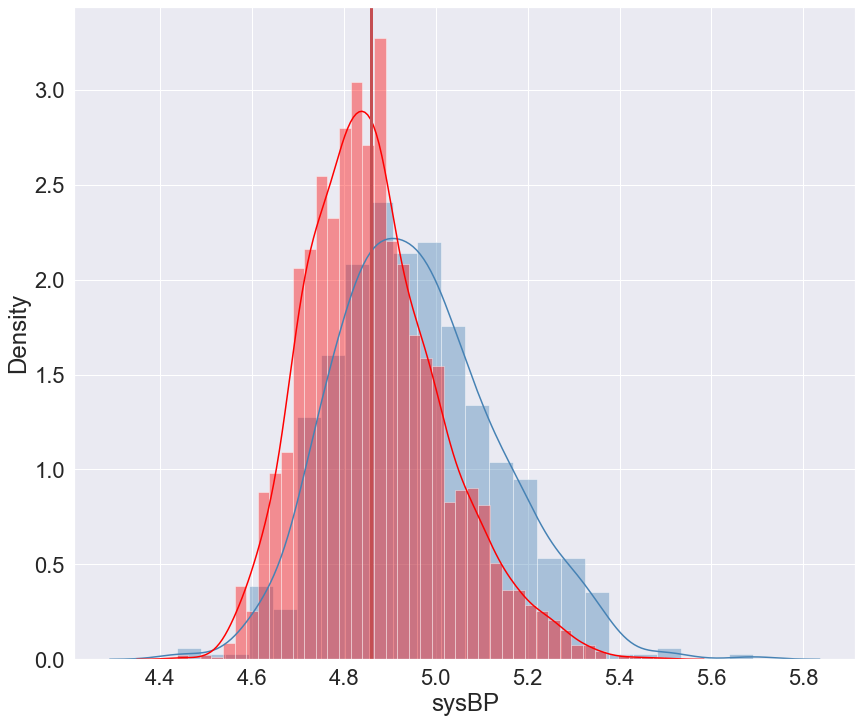

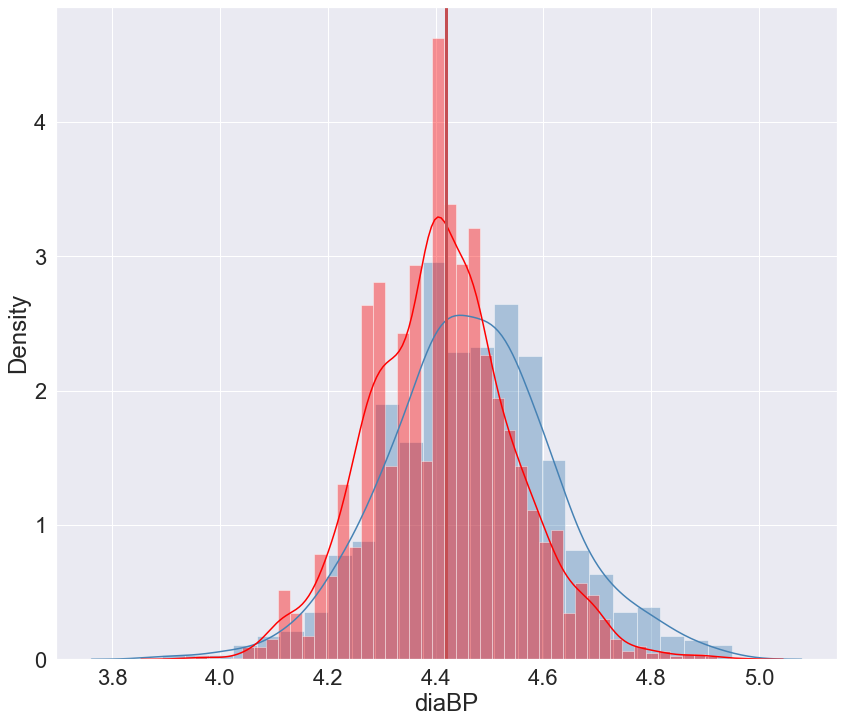

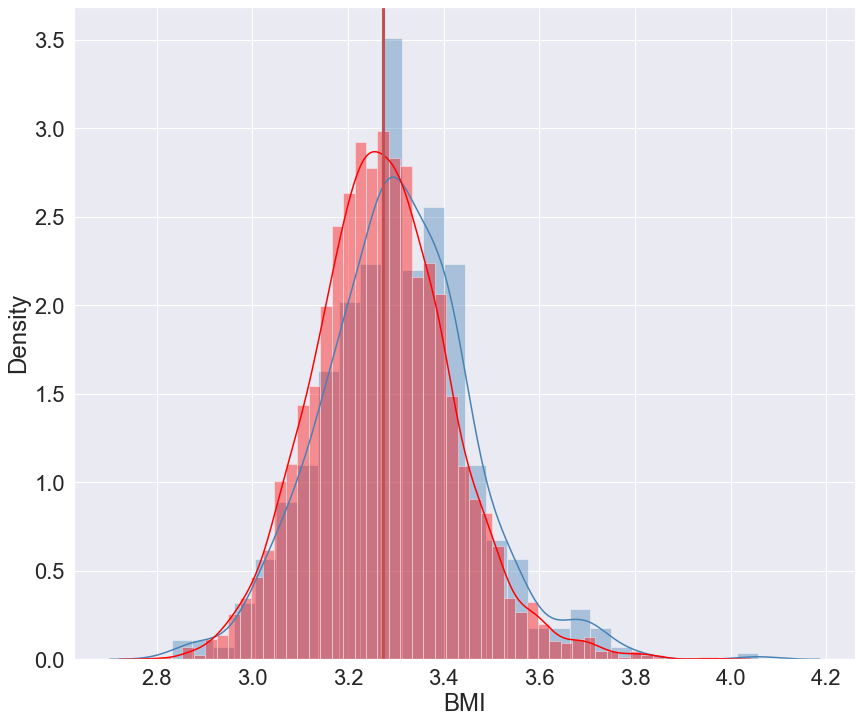

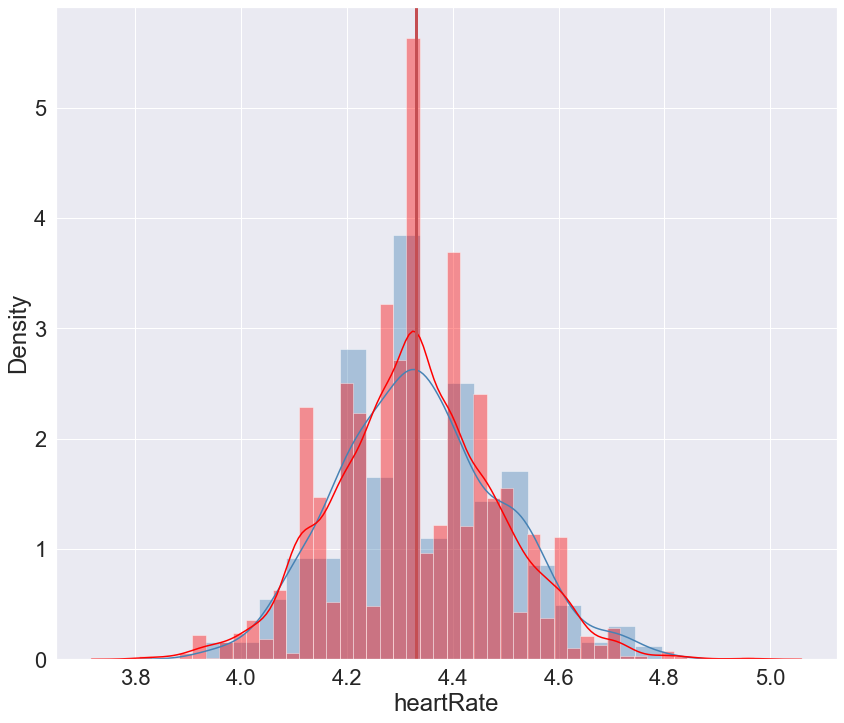

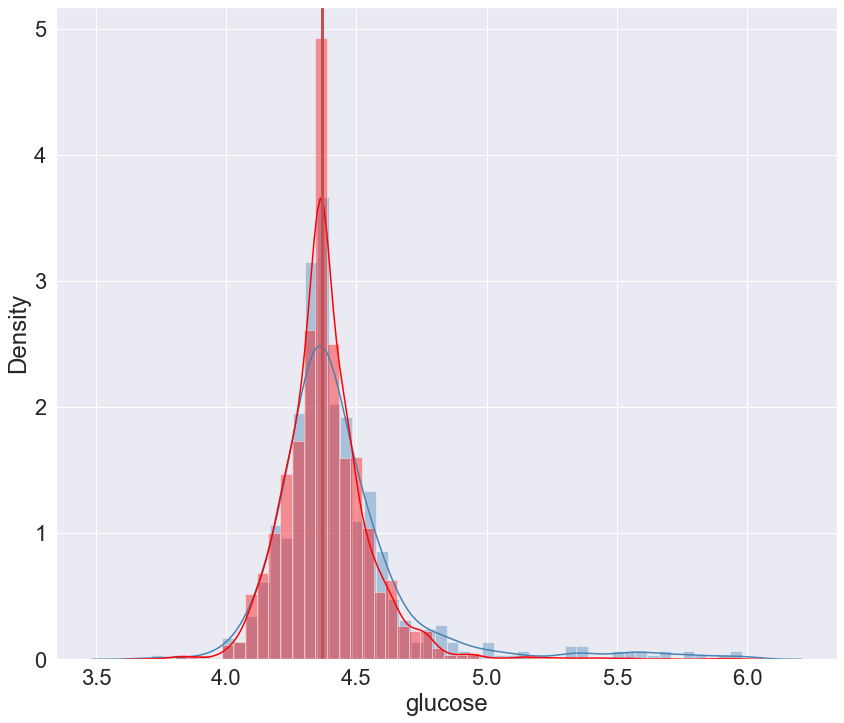

In [40]:
for colonne in variablesQuantitatives:
    afficheDistribution(donnees[colonne], donnees.TenYearCHD)

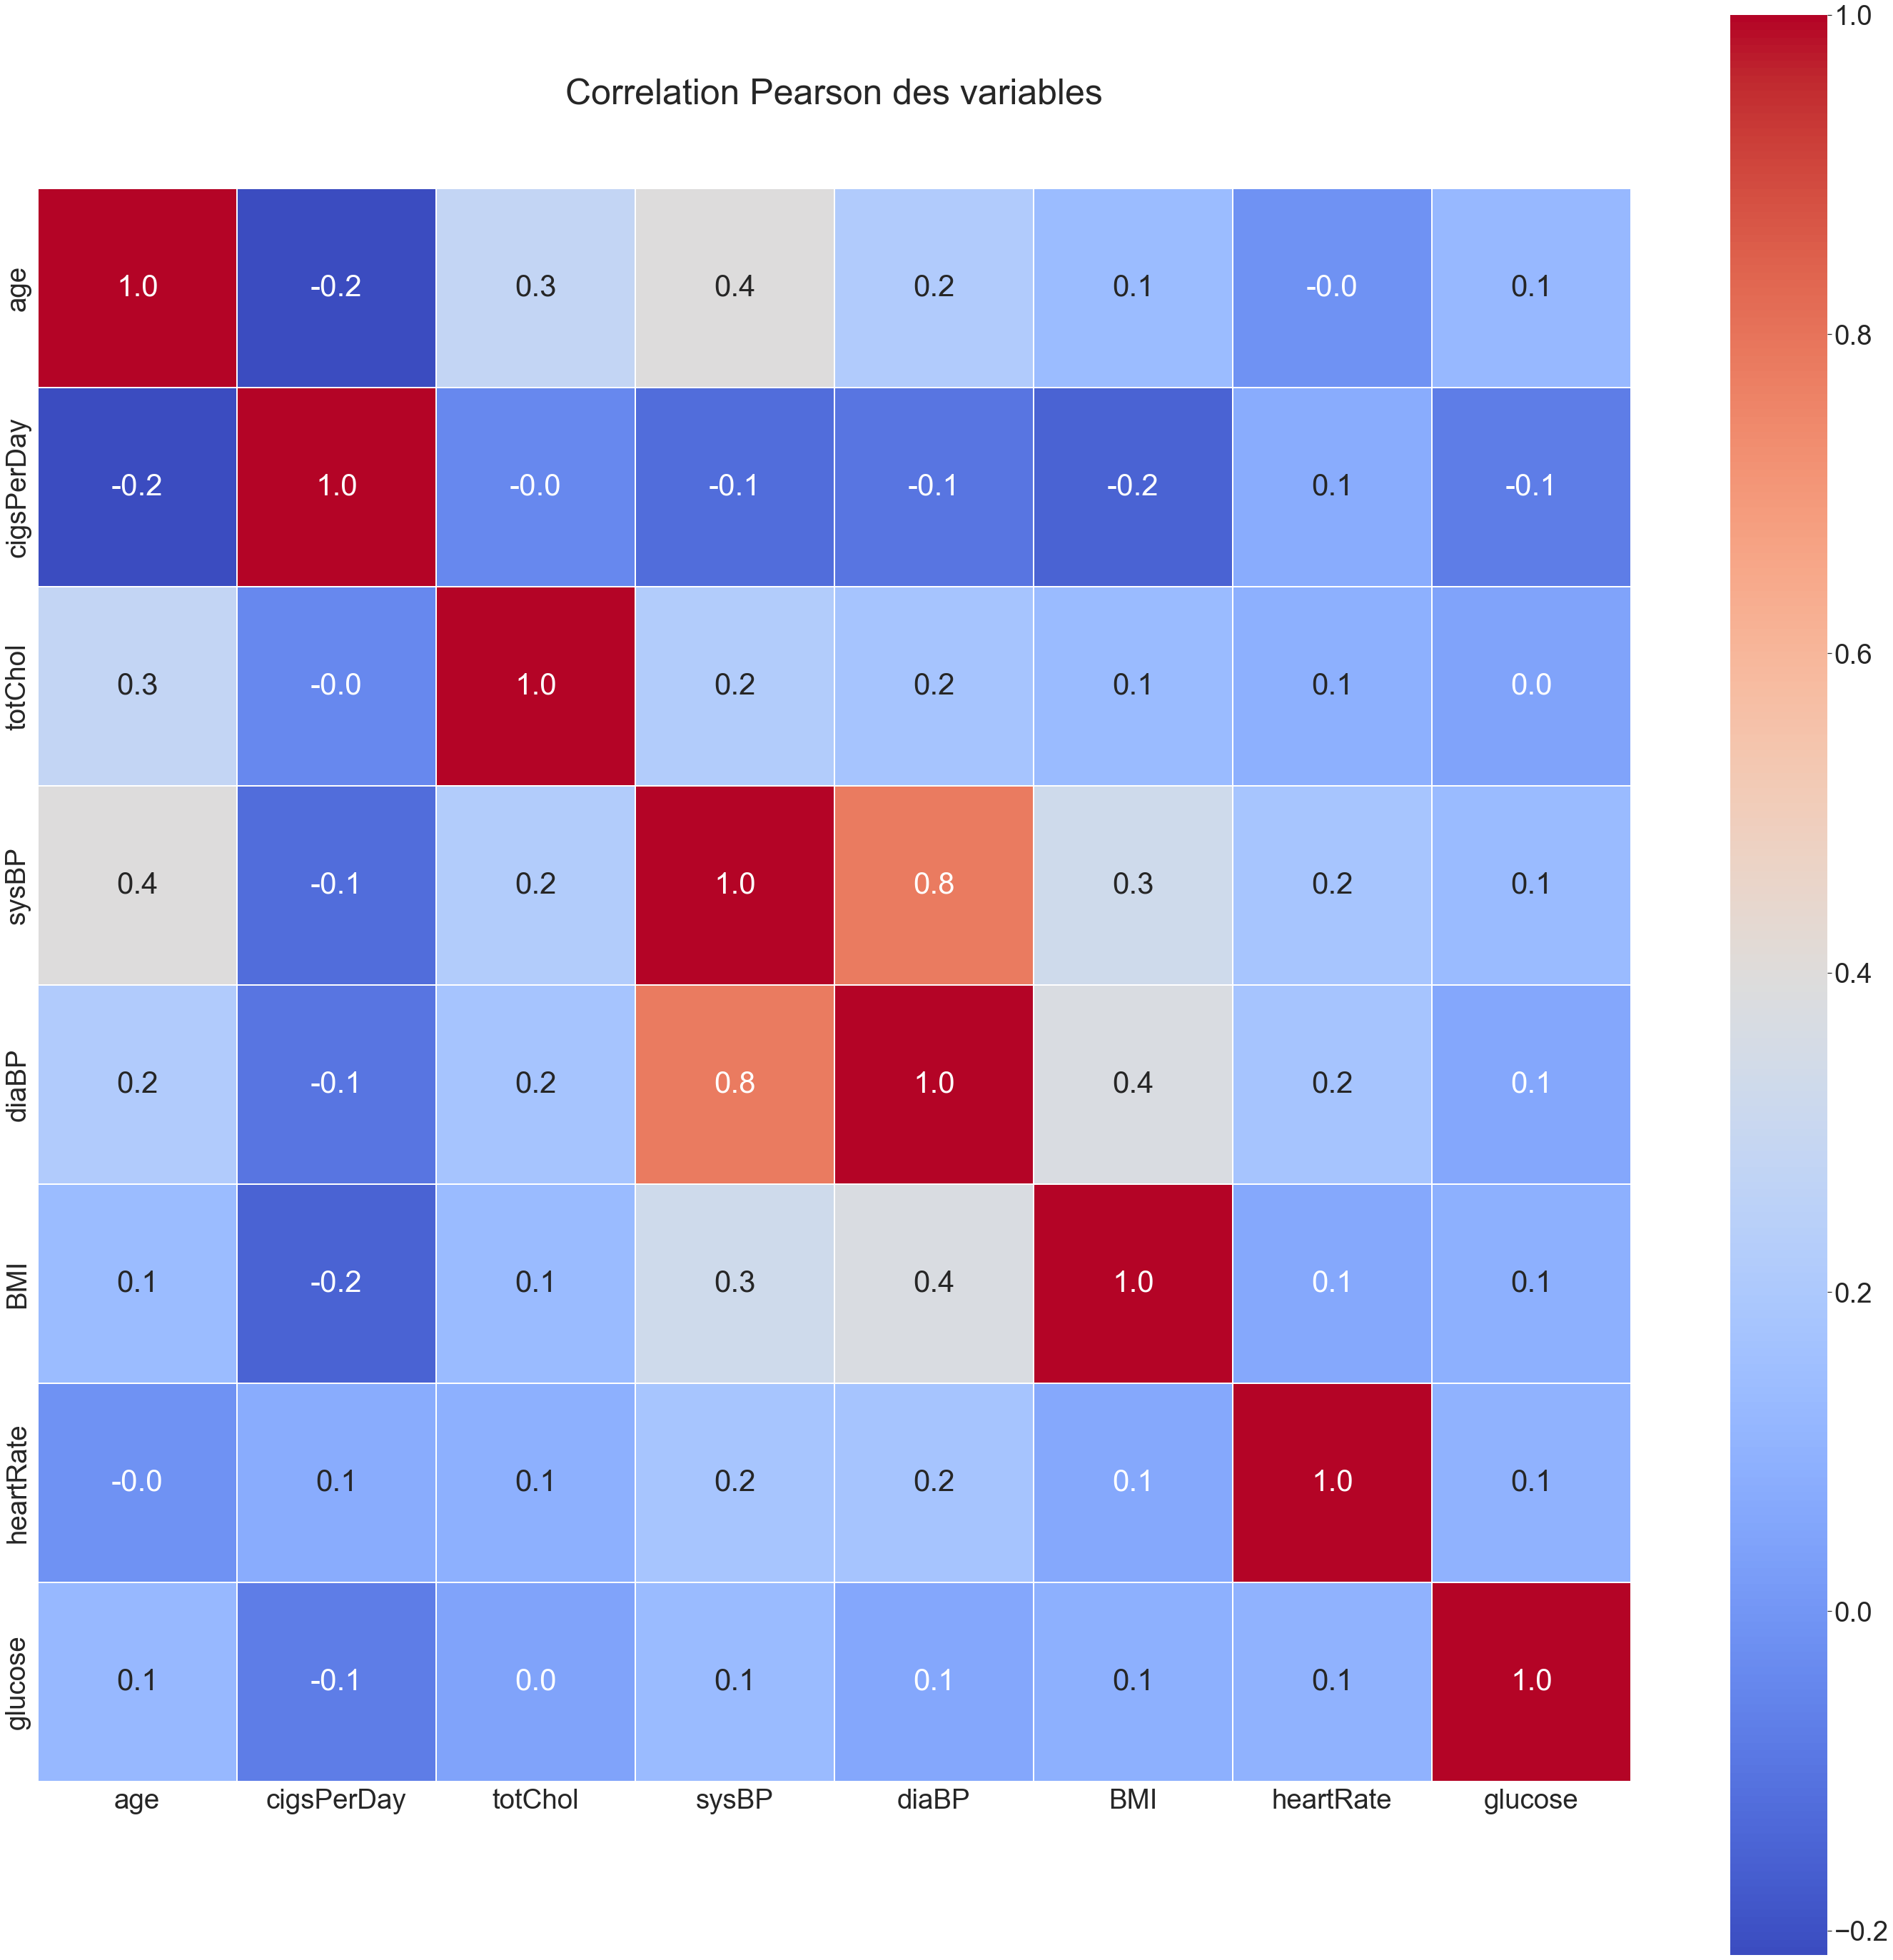

In [41]:
plt.figure(figsize=(50,50))
sns.set(font_scale=3.5)
plt.title('Correlation Pearson des variables', y=1.05, size=50)
sns.heatmap(donnees[variablesQuantitatives].corr(), fmt= '.1f',linewidths=0.3,vmax=1.0, 
            square=True, cmap='coolwarm', linecolor='white', annot=True);
sns.set(font_scale=2)

In [42]:
sns.set(font_scale=2)

In [43]:
X = donnees.drop(columns='TenYearCHD')
y = donnees.TenYearCHD

# La separation des données pour l'apprentissage

<img src="https://raw.githubusercontent.com/rbizoi/IntelligenceEnDonneesDeSante/main/images/EchantillonApprentissageTest.png" width="800">

In [44]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y, 
                                                     test_size=0.2, 
                                                     random_state=seed, 
                                                     stratify = y
                                                   ) 

In [45]:
X_train.shape, X_test.shape

((3390, 15), (848, 15))

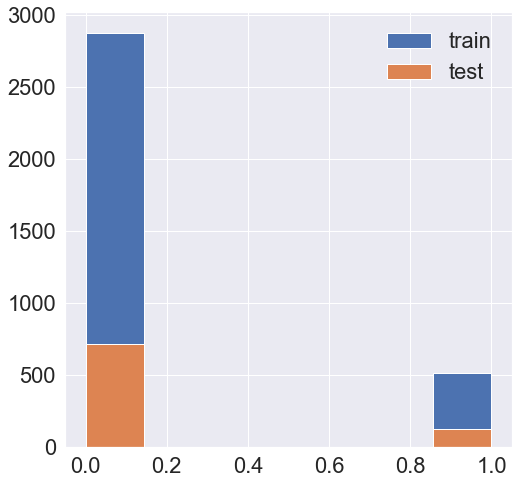

In [46]:
y_train.hist(bins=7, figsize=(8,8), label='train');
y_test.hist(bins=7, figsize=(8,8), label='test');
plt.legend();
sauvegarderImage("La separation des données pour l'apprentissage")